# Lecture 7- Spring 2025
## Villas-Boas

## Lecture 7 EEP 118 Spring 2025

4. Omitted Variable Bias (contin of Lecture 6)

Lecture 7

5. Statistical Properties of Estimator  betahat

   
    5.a. MLR1 to MLR4

   
	MLR1

	MLR2

	MLR3

	MLR4

    5.b. Multicollinearity 

     Statistical Property MLR5 -----> variance of betahat

6. Goodness of Fit



Study 3.3, 3.4, 3.6

Posted DA 7 – an exercise with MIT election lab data – does the variation in republican to democrat  2012 election results predict the 2016 republican to democrat election results across US counties
Problem set 2  posted

In [1]:

#set scientific display off, thank you Roy
options(scipen=999)


In [2]:
library(haven)
library(ggplot2)
library(tidyverse)
# haven for loading in dta files
# tidyverse for manipulating data and producing plots

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
#-------------------------------------------
#1. Read in data
#-------------------------------------------
my_data <- read_dta("Lecture6.dta")
head(my_data)

#number of observations
count(my_data)

wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,⋯,west,construc,ndurman,trcommpu,trade,services,profserv,profocc,clerocc,servocc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.75,2,39,13,0,0,1,0,1,0,⋯,0,0,0,0,0,0,1,0,0,1
2.92,3,51,30,1,0,0,0,1,0,⋯,0,0,0,0,0,1,0,0,0,1
3.51,4,39,15,0,0,1,5,1,0,⋯,1,0,0,0,1,0,0,0,0,0
3.00,4,48,0,1,0,1,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
3.00,4,36,0,0,0,1,1,0,0,⋯,0,1,0,0,0,0,0,0,0,0
5.20,6,47,13,1,0,1,0,1,0,⋯,0,1,0,0,0,0,0,0,0,0


n
<int>
526


### The Sample
Data for 526 respondents in the 2006 Population Survey of the US.

#### Sometimes there are missing values, below is how we don't use them, if we so wish

In [4]:
#use non-missing values only from now on
my_data2<-my_data[complete.cases(my_data),]

my_data3 <- my_data2[my_data2$wage !=Inf,] 
#or 
#my_data3 <-my_data2[my_data2$wage!=NA]

count(my_data3)


n
<int>
526


#### Now we use my_data3 but there were no missing data since the N is still 526, so we could still use the original my_data dataframe

## First create log of wage because that is what we will use in the model


In [5]:
my_data3$lwage<-log(my_data3$wage)
head(my_data3)

wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,⋯,construc,ndurman,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.75,2,39,13,0,0,1,0,1,0,⋯,0,0,0,0,0,1,0,0,1,1.321756
2.92,3,51,30,1,0,0,0,1,0,⋯,0,0,0,0,1,0,0,0,1,1.071584
3.51,4,39,15,0,0,1,5,1,0,⋯,0,0,0,1,0,0,0,0,0,1.255616
3.00,4,48,0,1,0,1,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1.098612
3.00,4,36,0,0,0,1,1,0,0,⋯,1,0,0,0,0,0,0,0,0,1.098612
5.20,6,47,13,1,0,1,0,1,0,⋯,1,0,0,0,0,0,0,0,0,1.648659


## Population Model - The fully specified one, and a misspecified one


Let the model (the full model) be

$log wage=\  \beta_0 + \beta_1  \ educ + \beta_2 \ exper + \beta_3 \ female + \beta_4 \ profocc + \ 𝑢 $,


where $\beta_4$ is the true marginal effect of profocc on y  given education, experience, and gender (variable female).



If we did not have data on profocc and estimated the misspecified model  (model misspecified)

$log wage=\  \tilde{\beta_0} + \tilde{\beta_2} \ exper + \tilde{\beta_3} \ female +  \tilde{\beta_4} \ profocc +\ \tilde{𝑢} $


would the estimator for the coeffient on profocc be affected?  

Would we have a bias problem?

In other words, would $\tilde{\beta_4}$ differ from $\beta_4$?

That is, do we need to worry about Omitted variable Bias (OVB) ?




## Regression of log wage on education, experience, female, and prof occupation

In [6]:

#regression model with x1 and white percentage in the county using my_data3

regfull<-lm(lwage ~ educ + exper+female+profocc, my_data3)
summary(regfull)


Call:
lm(formula = lwage ~ educ + exper + female + profocc, data = my_data3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85394 -0.26575 -0.01309  0.24596  1.16141 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  0.675273   0.108883   6.202 0.000000001137540371 ***
educ         0.069516   0.008085   8.598 < 0.0000000000000002 ***
exper        0.008174   0.001433   5.704 0.000000019625865590 ***
female      -0.314925   0.037140  -8.479 0.000000000000000234 ***
profocc      0.235639   0.044760   5.265 0.000000205828739360 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4184 on 521 degrees of freedom
Multiple R-squared:  0.3853,	Adjusted R-squared:  0.3805 
F-statistic: 81.63 on 4 and 521 DF,  p-value: < 0.00000000000000022


## Regression without educ

In [7]:
#regression no profocc as control
regmiss<-lm(lwage ~ exper+female+profocc, my_data3)
summary(regmiss)



Call:
lm(formula = lwage ~ exper + female + profocc, data = my_data3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.87793 -0.27228 -0.01541  0.26675  1.37875 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  1.549905   0.041438  37.403 < 0.0000000000000002 ***
exper        0.003959   0.001438   2.754              0.00609 ** 
female      -0.318734   0.039646  -8.039  0.00000000000000608 ***
profocc      0.432488   0.041059  10.533 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4466 on 522 degrees of freedom
Multiple R-squared:  0.298,	Adjusted R-squared:  0.294 
F-statistic: 73.88 on 3 and 522 DF,  p-value: < 0.00000000000000022


### What do you see when educ is omitted from the model? what happens to the estimate of the coefficient of profocc?


The R squared drops from  Multiple R-squared:  0.3853 to Multiple R-squared:  0.298.

AND

The estimated coefficient of `profocc' changes:

from 0.235639 in the full model to 0.432488 in the misspecified model, when we omit education from the model.

Why does it change like that? Let's go through the OVB formula and then look at this case


<img src="omitEduc.png" width="600" />

We omitted a relevant variable  experience that is correlated with the other independent variables in the model exper and profocc, and that is also correlated with the outcome, the dependent variable, lwage.

Lets see the correlations:

First lets see the correlation int he sample between profocc and education... 

What do you think?

We suspect it is positive, as a lawyer (an example of a profocc) has more years of education than a non profocc respondent in the survey.



In [9]:
cor(my_data3$educ,my_data3$profocc)

[1] 0.4967681

It is indeed positive and equal to 0.497.

What about the correlation between lwage and educ?

Does it make sense to you from your experience and from education research and theory models?

### Remember therefore that we are omitting educ that is positively correlated with profocc (the variable for which we are explaining the change in coefficient estimate)  and that educ is positively correlated with lwage (the outcome)

# Omitted variable Bias (OVB)

<img src="omitEduc.png" width="600" />

The coefficient of the Full model, 0.236 means,  that controlling for education (and gender and experience) prof occ respondents earn 23.6 % wages above the others.

If we neglect to include education, comparing workers with prof occ to those not (proff occ=0), the difference in log wage between the two groups is 0.432.

The coefficient of the Misspecified model, 0.432 means,  that controlling for education (and gender and experience) prof occ respondents earn 43.2%  wages above the others.

If we don't control for education, then education is in $\tilde{u}$ of the misspecified model.
And if any of the variables of the mispecified model are related to education we would have a problem and would have a bias.

In particular, if profocc is correlated with educ (which is in $\tilde{u}$ using the notation of the start of the notebook and also below), then we would violate Assumption 4 that nothing in the residual is related to any of the independent (right-hand-side) variables in the model. 

The estimate of the misspecified model for $\tilde{\beta_4} is biased and so 
0.432 includes both the profocc and the educ effect, because those with profocc are also more educated.



WE WILL SHOW THAT Since corr(profocc,educ)=0.4968 >0 and beta hat of educ also is positive, then ignoring education will bias the beta hat of profocc upwards! 

We over estimate the effect of profocc on wages if we omit education…. LETs GO !


### General Issue- why do we add variables to a regression? 

To improve the estimation (R squared) 

and

 to control for that added variable. 

When controlling for an additional variable, do we affect the estimated parameters? 

Maybe




### Using now  general notation, $y, x_1,$ and $x_2$

Let the model (the full model) be

$y=\  \beta_0 + \beta_1  \ x_1+ \beta_2 \ x_2 + \ 𝑢  \ \ \ $  (equation A),


where $\beta_1$ is the true marginal effect of $x_1$ on y  given $x_2$.



If we did not have data on $x_2$ and estimated the misspecified model  (model misspecified)

$y=\  \tilde{\beta_0} + \tilde{\beta_1} x_1  +\ \tilde{𝑢} $




### Suppose the $x_1$ and $x_2$ are related in the population with the following linear model

If we did not have data on $x_2$ and estimated the misspecified model  (model misspecified)

$x_2=\  a + \rho x_1  +\ v \ \ \ $   (equation B)



### substituting (equation B) from above into the full model (equation A)

$y=\  \beta_0 + \beta_1  \ x_1+ \beta_2 \ x_2 + \ 𝑢 $,

we get

$y=\  \beta_0 + \beta_1  \ x_1+ \beta_2 \ ( \  a + \rho x_1  +\ v \ ) + \ 𝑢 $,

### Rearranging to get all things multiplying $x_1$ together, we get the last equation in the following image

<img src="general.png" width="600" />

which is the misspecified model

$y=\  \tilde{\beta_0} + \tilde{\beta_1} x_1  +\ \tilde{𝑢} $


where 

### $\tilde{\beta_1}=\beta_1 + \beta_2 \ \rho$

### $\tilde{\beta_1}$ is not equal to the true $\beta_1$. there is a BIAS. 

The sign of the Bias consists of the sign of a product of two things 

The first is the sign of the correlation between x1 and x2, the variable we care about (x1) and the omitted one x2, which is the same sign as $\rho$

The second thing is the sign of the correlation between the outcome y and x2 that we omit which is the same sign as $\beta_2$.



# going back to the lwage model

### Remember therefore that we are omitting educ that is positively correlated with profocc (the variable for which we are explaining the change in coefficient estimate)  and that educ is positively correlated with lwage (the outcome)

<img src="omitEduc.png" width="600" />

# the Sign of the bias is the sign of $(\rho \ \beta_2) $, that is the sign of the product ( corr(profocc,educ) * corr(educ,lwage) )

In [10]:
#type code here
cor(my_data3$educ,my_data3$profocc)

cor(my_data3$educ,my_data3$lwage)



[1] 0.4967681

[1] 0.4310528


<img src="two.png" width="500" />

# Since both positive, then we have a positive BIAS

We estimate a coefficient that is too big.

### We over estimate the effect of profocc on lwage by omitting educ from the model




# the end of this part

# Lets code together how we would figure out why the coeff of experience changed when we omitted educ
<img src="boardLecture6.jpg" width="600" />

In [ ]:
cor(my_data3$educ,my_data3$exper)

cor(my_data3$educ,my_data3$lwage)



<img src="omitEduc.png" width="600" />

Omitting education will bias $\tilde{\beta}_{𝒆𝒙𝒑𝒆𝒓}$  downwards


# Take Away
What happens when we omit variables x2 to the parameter beta1 tilde relative to beta1? 

Is beta1 tilde larger than the true beta 1? 

Is beta1 tilde smaller than the true beta1? 

Or it does not matter if we omit x2 because beta1 tilde is the same as beta1

To answer this, we need to know two things

FIRST: We need to know the correlation of x2 omitted and x1

SECOND: we need to know the Effect of omitted x2 on Y in the true model


# 5. Statistical Properties of Estimator betahat   $\hat{\beta}$

   
## 5.a. Multiple Linear Regression (MLR) Assumptions: MLR1 to MLR4

MLR1. Model is linear in parameters for a given population 
$𝑦=𝛽_0+𝛽_1 𝑥_1+…+𝛽_𝑘 𝑥_𝑘+𝑢$.

MLR2. ${(𝑥_{𝑖1}\ … \ 𝑥_{𝑖𝑘} \  𝑦_𝑖), i=1,…n}$ a random sample from the population of interest

MLR3. No perfect collinearity among the x in linear relationship

MLR4. E[u]=0 and zero conditional mean $E[u \ | \ 𝑥_1…𝑥_𝑘]=0$


IF Assumptions MLR1 to MLR4 ----> then $\hat{\beta}$ is unbiased: $E[\hat{\beta}]= \beta$.





## 5.b. Assumption MLR5. Homoskedasticity


If $Var(u \ | 𝑥_1 \ …\ 𝑥_𝑘)$ independent of x (call it  $𝜎^2$), i.e., we have homoscedasticity, 

then for a particular coefficient $\hat{\beta_j}$
its variance is given by

$𝑉𝑎𝑟(\hat{𝛽}_𝑗 )  = \ \frac{\sigma^2}{SST_{xj}(1−𝑹_𝒋^𝟐)}$,

where $𝜎^2$ is the noise in the relation, the larger, the more imprecise the estimates $\hat{\beta}$



$𝑺𝑺𝑻_{𝒙𝒋}$ is the total sample variation in $𝑥_𝑗$. If that is large, then better precision of estimated beta_hat. 

In particular, $𝑆𝑆𝑇_{𝑥𝑗}=\sum_i〖(𝑥_{𝑖𝑗}−\bar{𝑥_𝑗}^2 =(N-1) s_{𝑥𝑗}^2$.


and finally

$𝑹_𝒋^𝟐$ is the R squared of how $x_j$ can be explained by the other x’s, that is, the R squared of

$𝑥_𝑗=𝛿_0+𝛿_1 𝑥_1+…+𝛿_𝑘 𝑥_𝑘+𝑣$.  


If $𝑹_𝒋^𝟐$  approaches 1, or close to it, the we have multicollinearity, the x's can be explained well by other xs, and then the variance of the betahats (the estimated coefficients) increases a lot, and standard errors also! 

## Lets look at the issue of $R^2_j$ being large, and even close to 1, to investigate the issue of multicollinearity.


# Multicollinearity

The issue of multicollinearity pertains to linear relationship between the x’s, that is how close we can explain one $x_j$ in terms of the other Xs, measured by $R_j^2$ in the formula above.

If variables are constructed from each other, collinearity happens.


In [11]:
#Baseline Model 
regBase <- lm(lwage~educ+educ+exper+female+profocc, my_data3)
summary(regBase)


Call:
lm(formula = lwage ~ educ + educ + exper + female + profocc, 
    data = my_data3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85394 -0.26575 -0.01309  0.24596  1.16141 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  0.675273   0.108883   6.202 0.000000001137540371 ***
educ         0.069516   0.008085   8.598 < 0.0000000000000002 ***
exper        0.008174   0.001433   5.704 0.000000019625865590 ***
female      -0.314925   0.037140  -8.479 0.000000000000000234 ***
profocc      0.235639   0.044760   5.265 0.000000205828739360 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4184 on 521 degrees of freedom
Multiple R-squared:  0.3853,	Adjusted R-squared:  0.3805 
F-statistic: 81.63 on 4 and 521 DF,  p-value: < 0.00000000000000022


### Generate a variable that is equal to one if a respondent does not have profocc and equal to zero otherwise

notProfOcc= 1- profocc

The $R_j^2$ between the two variables above is exactly 1. 

We can be perfectly explained by the other by subtracting from 1 the variable...


In [12]:
my_data3$notProfocc=1-my_data3$profocc

head(my_data3$profocc)
head(my_data3$notProfocc)

[1] 0 0 0 0 0 0

[1] 1 1 1 1 1 1

## perfect collinearity

Note in the regression below,  that notProfocc coefficient cannot be estimated 
because profocc is 1-notProfocc, they are perfectly collinear.

Try running

$lwage=𝛽_0+\ 𝛽_1 \ educ +\ 𝛽_2 \  exper+\ 𝛽_3 \ female+ \beta_4 \ profocc + \beta_5 \ notProfocc + \ 𝑢 $ 

  where profocc + notProfocc=1

Problems with collinearity 

If exact collinearity -> cannot estimate. 

Cannot think of the effect of one variable keeping the other constant


In [13]:
#Alternative Model – Perfect collinearity

regPC <- lm(lwage~educ+educ+exper+female+ profocc+notProfocc, my_data3)
summary(regPC)

#note in the regression output below,  that notProfocc coefficient is not estimated 
# because profocc is 1-notProfocc, they are perfectly collinear
#with each other, 
#the line notProfocc has NA   NA

#NA means Non available 


Call:
lm(formula = lwage ~ educ + educ + exper + female + profocc + 
    notProfocc, data = my_data3)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85394 -0.26575 -0.01309  0.24596  1.16141 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  0.675273   0.108883   6.202 0.000000001137540371 ***
educ         0.069516   0.008085   8.598 < 0.0000000000000002 ***
exper        0.008174   0.001433   5.704 0.000000019625865590 ***
female      -0.314925   0.037140  -8.479 0.000000000000000234 ***
profocc      0.235639   0.044760   5.265 0.000000205828739360 ***
notProfocc         NA         NA      NA                   NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4184 on 521 degrees of freedom
Multiple R-squared:  0.3853,	Adjusted R-squared:  0.3805 
F-statistic: 81.63 on 4 and 521 DF,  p-value: < 0.00000000000000022


# Multi collinearity

What if we have a model that has  two variables that are not perfectly collinear but highly correlated


 # What is the problem?

The model estimates but  the standard errors of the estimates will increase if there is multicollinearity
 


### I will generate a random variable and add to the dataframe that is very related to education


In [14]:
#I will generate a random variable and add to the dataframe that is very related to education

#generate two random uniform objects
A<-randu
B<-randu
tempA<-A[1:400,1]
tempB<-B[1:126,1]

#create a column of 526 rows of random uniform
C<-c(tempA,tempB)

#add that random uniform times 2 to education variable and create the trouble variable
my_data3$trouble<-my_data3$educ+2*C


In [15]:
#Alternative Model – Multi collinearity (MC)
regMC <- lm(lwage~educ+educ+exper+female+profocc+trouble, my_data3)
summary(regMC)


#where cor(my_data3$educ,my_data3$trouble)= .979442314275803




Call:
lm(formula = lwage ~ educ + educ + exper + female + profocc + 
    trouble, data = my_data3)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8556 -0.2709 -0.0182  0.2406  1.1750 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  0.703080   0.112523   6.248 0.000000000864255679 ***
educ         0.101049   0.033175   3.046              0.00244 ** 
exper        0.008260   0.001436   5.753 0.000000014962109867 ***
female      -0.314198   0.037149  -8.458 0.000000000000000277 ***
profocc      0.236268   0.044766   5.278 0.000000192273265980 ***
trouble     -0.031280   0.031916  -0.980              0.32750    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4184 on 520 degrees of freedom
Multiple R-squared:  0.3864,	Adjusted R-squared:  0.3805 
F-statistic: 65.49 on 5 and 520 DF,  p-value: < 0.00000000000000022


In [16]:
cor(my_data3$educ,my_data3$trouble)


[1] 0.9794423

## Compared to the baseline model,  the standard errors of the estimates will increase if there is multicollinearity

estimated see(betahat_educ) = 0.033798  now

in the baseline model was 0.008085



# 7. Goodness of Fit

We look the the R squared, as usual.

We know that  $𝑆𝑆𝑅= \sum_i (\hat{𝑢_𝑖}^2 )$   

$𝑆𝑆𝐸=\sum_i(\hat{y_i} −\bar{𝑦 })^2$ , 

and $𝑆𝑆𝑇=\sum_i(y_i −\bar{𝑦 })^2$ .

so $𝑅^2=\frac{𝑆𝑆𝐸}{𝑆𝑆𝑇}=1−\frac{𝑆𝑆𝑅}{𝑆𝑆𝑇}$


In the R output that is the Multiple R-squared:  0.3853  of the Baseline Model

### put Y and Y hat on same graph and x1 on horizontal axis
make combined scatter plot of Y data and fitted values of Y (Yhat)
given regression estimates 

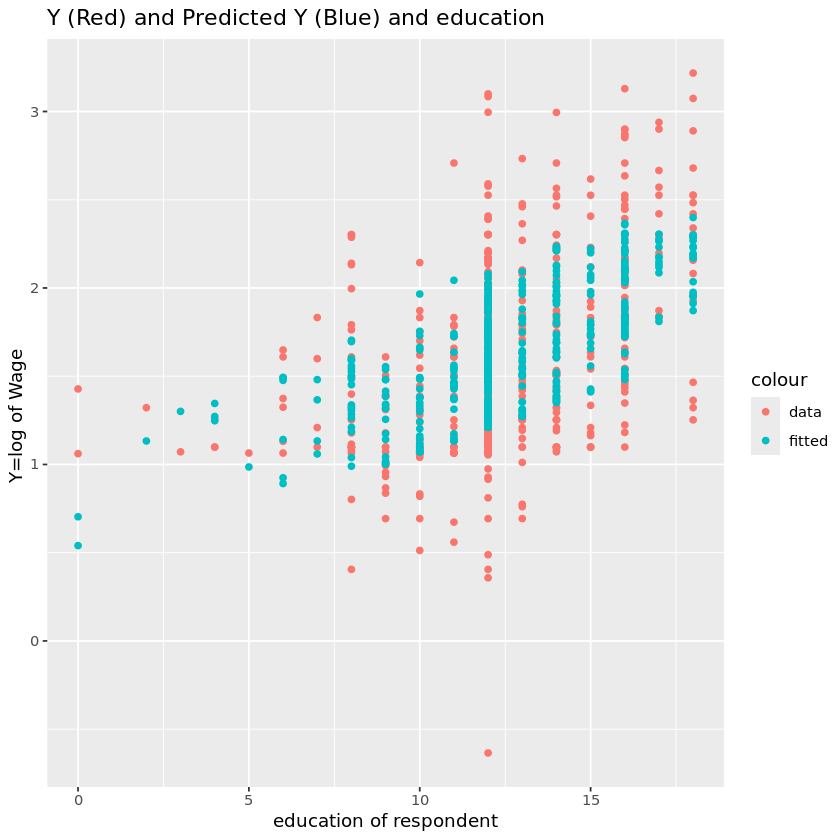

In [17]:
#for graph 
#get the predicted Y hats
my_data3$lwageHat<-regBase$fitted.values

#put Y and Y hat on same graph and x1 on horizontal axis
#make a combined scatter plot of Y data and fitted values of Y (Yhat)

scatter_data_fittedVals <- ggplot(data = my_data3) + geom_point(aes(x=educ, y=lwage, color = "data")) +
  geom_point(aes(x=educ, y=lwageHat, color = "fitted")) + 
  xlab("education of respondent") + ylab("Y=log of Wage ") +
  ggtitle("Y (Red) and Predicted Y (Blue) and education")
scatter_data_fittedVals

# TAKE AWAY OVB

<img src="one.png" width="600" />

# Please answer this survey after today's lecture

https://forms.gle/BDh2Fik95fQAcVbj6


thank you



# THE END